# Impact Data functionalities


Import data from EM-DAT CSV file and populate Impact()-object with the data.


The core functionality of the module is to read disaster impact data as downloaded from the International Disaster Database EM-DAT (www.emdat.be) and produce a CLIMADA Impact()-instance from it.
The purpose is to make impact data easily available for comparison with simulated impact inside CLIMADA, e.g. for calibration purposes.


## Data Source
The International Disaster Database EM-DAT www.emdat.be

Download: https://public.emdat.be/ (register for free and download data to continue)


## Most important functions
- clean_emdat_df: read CSV from EM-DAT into a DataFrame and clean up.
- emdat_to_impact: create Impact-instance populated with impact data from EM-DAT data (CSV).
- emdat_countries_by_hazard: get list of countries affected by a certain haazrd (disaster (sub-)type) in EM-DAT.
- emdat_impact_yearlysum: create DataFrame with impact from EM-DAT summed per country and year.



## Demo data

The demo data used hee (demo_emdat_impact_data_2020.csv) contains entries for the disaster subtype "Tropical cyclone" from 2000 to 2020.


In [1]:
"""Load required packages and set path to CSV-file from EM-DAT"""

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from climada.util.constants import DEMO_DIR
from climada.engine.impact_data import emdat_countries_by_hazard, \
    emdat_impact_yearlysum, emdat_to_impact, clean_emdat_df

# set path to CSV file downloaded from https://public.emdat.be :
emdat_file_path = 'C:\\Users\\felip\\climada_python\\data\\demo\\Las_Resport111.csv'
print(emdat_file_path)

C:\Users\felip\climada_python\data\demo\Las_Resport111.csv


### clean_emdat_df()
read CSV from EM-DAT into a DataFrame and clean up.

Use the parameters countries, hazard, and year_range to filter. These parameters are the same for most functions shown here.

In [2]:
"""Create DataFrame df with EM-DAT entries of tropical cyclones in Thailand and Viet Nam in the years 2005 and 2006"""

df = clean_emdat_df(emdat_file_path, countries=['CHL', 'Chile'], hazard=['Earthquake'], \
                            year_range=[2000, 2021])
print(df)
df.dtypes

          Dis No  Year  Seq  Disaster Group Disaster Subgroup Disaster Type  \
0  2005-0321-CHL  2005  321             NaN           Natural   Geophysical   
1  2007-0158-CHL  2007  158             NaN           Natural   Geophysical   
2  2007-0587-CHL  2007  587             NaN           Natural   Geophysical   
3  2010-0091-CHL  2010   91             NaN           Natural   Geophysical   
4  2012-0126-CHL  2012  126             NaN           Natural   Geophysical   
5  2014-0094-CHL  2014   94             NaN           Natural   Geophysical   
6  2015-0435-CHL  2015  435             NaN           Natural   Geophysical   
7  2019-0023-CHL  2019   23             NaN           Natural   Geophysical   

  Disaster Subtype Disaster Subsubtype  Event Name  Entry Criteria  ...  \
0       Earthquake     Ground movement         NaN             NaN  ...   
1       Earthquake             Tsunami         NaN             NaN  ...   
2       Earthquake     Ground movement         NaN             

Dis No                              object
Year                                 int64
Seq                                  int64
Disaster Group                     float64
Disaster Subgroup                   object
Disaster Type                       object
Disaster Subtype                    object
Disaster Subsubtype                 object
Event Name                         float64
Entry Criteria                     float64
Country                             object
ISO                                 object
Region                              object
Continent                           object
Location                            object
Origin                              object
Associated Dis                      object
Associated Dis2                     object
OFDA Response                       object
Appeal                              object
Declaration                         object
Aid Contribution                   float64
Dis Mag Value                        int64
Dis Mag Sca

### emdat_countries_by_hazard()

Pick a hazard and a year range to get a list of countries affected from the EM-DAT data.

In [3]:
"""emdat_countries_by_hazard: get lists of countries impacted by tropical cyclones from 2010 to 2019"""

iso3_codes, country_names = emdat_countries_by_hazard(emdat_file_path, hazard='Earthquake', year_range=(2000, 2021))

print(country_names)

print(iso3_codes)

['Chile']
['CHL']


### emdat_to_impact()
function to load EM-DAT impact data and return impact set with impact per event

##### Parameters:
- emdat_file_csv (str): Full path to EMDAT-file (CSV)
- hazard_type_climada (str): Hazard type abbreviation used in CLIMADA, e.g. 'TC'

##### Optional parameters:

- hazard_type_emdat (list or str): List of Disaster (sub-)type accordung EMDAT terminology or CLIMADA hazard type abbreviations. e.g. ['Wildfire', 'Forest fire'] or ['BF']
- year_range (list with 2 integers): start and end year e.g. [1980, 2017]
- countries (list of str): country ISO3-codes or names, e.g. ['JAM', 'CUB']. Set to None or ['all'] for all countries 
- reference_year (int): reference year of exposures for normalization. Impact is scaled proportional to GDP to the value of the reference year. No scaling for reference_year=0 (default)
- imp_str (str): Column name of impact metric in EMDAT CSV, e.g. 'Total Affected'; default = "Total Damages"

##### Returns:
- impact_instance (instance of climada.engine.Impact):
            Impact() instance (same format as output from CLIMADA impact computations).
            Values are scaled with GDP to reference_year if reference_year not equal 0.
            impact_instance.eai_exp holds expected annual impact for each country.
            impact_instance.coord_exp holds rough central coordinates for each country.
- countries (list): ISO3-codes of countries imn same order as in impact_instance.eai_exp


In [4]:
"""Global Earthquake damages 2000 to 2021"""

impact_emdat, countries = emdat_to_impact(emdat_file_path, 'Earthquake', year_range=(2000,2021))

print('Number of Earthquake events in EM-DAT 2000 to 2021 globally: %i' %(impact_emdat.event_id.size))
print('Global annual average monetary damage (AAI) from Earthquakes as reported in EM-DAT 2000 to 2021: USD billion %2.2f' \
      %(impact_emdat.aai_agg/1e9))


Number of Earthquake events in EM-DAT 2000 to 2021 globally: 8
Global annual average monetary damage (AAI) from Earthquakes as reported in EM-DAT 2000 to 2021: USD billion 1.41


Number of Earthquake events in EM-DAT in Chile, 2010: 1

People affected by Earthquake events in Chile in 2010 (per event):
[2671556.]

People affected by Earthquake events in Chile in 2010 (total):
2671556


Text(0, 0.5, 'People Affected')

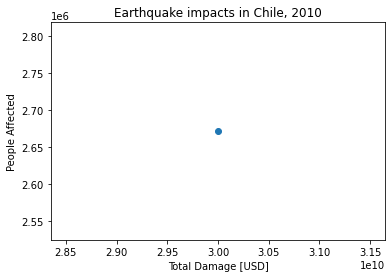

In [5]:
"""Total people affected by Earthquake in the Chile in 2010:"""

# People affected
impact_emdat_PHL, countries = emdat_to_impact(emdat_file_path, 'Earthquake', countries='CHL', \
                                    year_range=(2010,2010), imp_str="Total Affected")

print('Number of Earthquake events in EM-DAT in Chile, 2010: %i' \
      %(impact_emdat_PHL.event_id.size))
print('\nPeople affected by Earthquake events in Chile in 2010 (per event):')
print(impact_emdat_PHL.at_event)
print('\nPeople affected by Earthquake events in Chile in 2010 (total):')
print(int(impact_emdat_PHL.aai_agg))

# Comparison to monetary damages:
impact_emdat_PHL_USD, _ = emdat_to_impact(emdat_file_path, 'Earthquake', countries='CHL', \
                                    year_range=(2010,2010))

ax = plt.scatter(impact_emdat_PHL_USD.at_event, impact_emdat_PHL.at_event)
plt.title('Earthquake impacts in Chile, 2010')
plt.xlabel('Total Damage [USD]')
plt.ylabel('People Affected')
#plt.xscale('log')
#plt.yscale('log')

### emdat_impact_yearlysum()

function to load EM-DAT impact data and return DataFrame with impact summed per year and country

##### Parameters:
- emdat_file_csv (str): Full path to EMDAT-file (CSV)

##### Optional parameters:

- hazard (list or str): List of Disaster (sub-)type accordung EMDAT terminology or CLIMADA hazard type abbreviations. e.g. ['Wildfire', 'Forest fire'] or ['BF']
- year_range (list with 2 integers): start and end year e.g. [1980, 2017]
- countries (list of str): country ISO3-codes or names, e.g. ['JAM', 'CUB']. Set to None or ['all'] for all countries 
- reference_year (int): reference year of exposures for normalization. Impact is scaled proportional to GDP to the value of the reference year. No scaling for reference_year=0 (default)
- imp_str (str): Column name of impact metric in EMDAT CSV, e.g. 'Total Affected'; default = "Total Damages"
- version (int): given EM-DAT data format version (i.e. year of download), changes naming of columns/variables (default: 2020)

##### Returns:
- pandas.DataFrame with impact per year and country

2021-10-06 09:10:34,079 - climada.util.finance - INFO - GDP CHL 2019: 2.794e+11.
[2005 2007 2010 2012 2014 2015 2019]
2021-10-06 09:10:34,742 - climada.util.finance - INFO - GDP CHL 2005: 1.230e+11.
2021-10-06 09:10:35,420 - climada.util.finance - INFO - GDP CHL 2007: 1.736e+11.
2021-10-06 09:10:36,059 - climada.util.finance - INFO - GDP CHL 2010: 2.185e+11.
2021-10-06 09:10:36,714 - climada.util.finance - INFO - GDP CHL 2012: 2.671e+11.
2021-10-06 09:10:37,387 - climada.util.finance - INFO - GDP CHL 2014: 2.605e+11.
2021-10-06 09:10:38,031 - climada.util.finance - INFO - GDP CHL 2015: 2.439e+11.
2021-10-06 09:10:38,686 - climada.util.finance - INFO - GDP CHL 2019: 2.794e+11.


Text(0, 0.5, 'Total Damage [USD]')

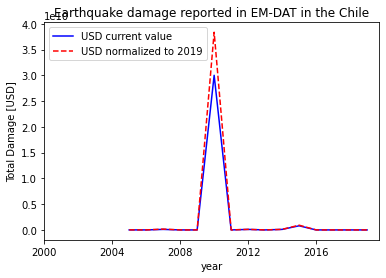

In [6]:
"""Yearly Earthquake damages in the CHILE, normalized and current"""

yearly_damage_normalized_to_2019 = emdat_impact_yearlysum(emdat_file_path, countries='CHL', \
                                                       hazard='Earthquake', year_range=None, \
                                                       reference_year=2019)

yearly_damage_current = emdat_impact_yearlysum(emdat_file_path, countries=['CHL'], hazard='Earthquake',)

import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 1)
axis.plot(yearly_damage_current.year, yearly_damage_current.impact, 'b', label='USD current value')
axis.plot(yearly_damage_normalized_to_2019.year, yearly_damage_normalized_to_2019.impact_scaled, \
          'r--', label='USD normalized to 2019')
plt.legend()
axis.set_title('Earthquake damage reported in EM-DAT in the Chile')
axis.set_xticks([2000, 2004, 2008, 2012, 2016])
axis.set_xlabel('year')
axis.set_ylabel('Total Damage [USD]')
